In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
def flipSEQ(sequence): #list of seqs in that window
    comp = []
    for base in sequence:
        if base == "A":
            comp.append("T")
        elif base == "G":
            comp.append("C")
        elif base == "T":
            comp.append("A")
        elif base == "C":
            comp.append("G")
        else:
            comp.append('N')
    # reverse the sequence
    comp_rev = comp[::-1]
    
    # convert list to string
    comp_rev = "".join(comp_rev)
    return comp_rev

In [2]:
top_motifs = pd.read_csv('6nt-positions.csv')
def cleanConcat(species,idx):
    revcomp= pd.concat([top_motifs[species].apply(lambda x: flipSEQ(x)),top_motifs[idx]],axis=1)
    return pd.concat([revcomp,top_motifs.loc[:,[species,idx]]],axis=0,ignore_index=True)
def cleanMerge(df,right_on,idx):
    right_db = cleanConcat(right_on,idx)
    return df.merge(right_db,how='left',left_on='Human',right_on=right_on)


In [3]:
# humanRevComp = pd.concat([top_motifs.Human.apply(lambda x: flipSEQ(x)),top_motifs.pvalH],axis=1)
# human = pd.concat([humanRevComp,top_motifs.loc[:,['Human','pvalH']]],axis=0,ignore_index=True)
human = cleanConcat('Human','pvalH')
human

,Human,pvalH
0,CCCCGC,4.180000e-12
1,GGGCGG,6.880000e-08
2,CCCGCC,1.950000e-07
3,CGTCAC,1.860000e-06
4,TGGCCA,8.880000e-06
...,...,...
4155,CACGGC,9.985700e-01
4156,CGGGTT,9.989898e-01
4157,ACCAAA,9.993825e-01
4158,TTATCA,9.995840e-01


In [4]:
total = cleanMerge(human,'Chimp','pvalC')
total = cleanMerge(total, 'Monkey','pvalM')
total = cleanMerge(total,'Mouse','pvalMouse')
total = total.merge(top_motifs.loc[:,['Rat','pvalR']],how='right',left_on='Human',right_on='Rat')
total

,Human,pvalH,Chimp,pvalC,Monkey,pvalM,Mouse,pvalMouse,Rat,pvalR
0,CCATGG,0.004981,CCATGG,0.149451,CCATGG,0.106803,CCATGG,0.090318,CCATGG,1.380000e-07
1,CCATGG,0.004981,CCATGG,0.149451,CCATGG,0.106803,CCATGG,0.090318,CCATGG,1.380000e-07
2,CCATGG,0.004981,CCATGG,0.149451,CCATGG,0.106803,CCATGG,0.090318,CCATGG,1.380000e-07
3,CCATGG,0.004981,CCATGG,0.149451,CCATGG,0.106803,CCATGG,0.090318,CCATGG,1.380000e-07
4,CCATGG,0.004981,CCATGG,0.149451,CCATGG,0.106803,CCATGG,0.090318,CCATGG,1.380000e-07
...,...,...,...,...,...,...,...,...,...,...
3035,ATGCAT,0.037767,ATGCAT,0.094072,ATGCAT,0.031826,ATGCAT,0.006601,ATGCAT,9.978845e-01
3036,ATGCAT,0.037767,ATGCAT,0.094072,ATGCAT,0.031826,ATGCAT,0.006601,ATGCAT,9.978845e-01
3037,ATGCAT,0.037767,ATGCAT,0.094072,ATGCAT,0.031826,ATGCAT,0.006601,ATGCAT,9.978845e-01
3038,ATGCAT,0.037767,ATGCAT,0.094072,ATGCAT,0.031826,ATGCAT,0.006601,ATGCAT,9.978845e-01


In [7]:
total.dropna(axis=0).drop_duplicates().sort_values('pvalH')#.to_csv('6nt-comparisons.csv',index=False)#.loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']]

,Human,pvalH,Chimp,pvalC,Monkey,pvalM,Mouse,pvalMouse,Rat,pvalR
738,CCCCGC,4.180000e-12,CCCCGC,0.482912,CCCCGC,0.160531,CCCCGC,0.705022,CCCCGC,0.058950
921,GGGCGG,6.880000e-08,GGGCGG,0.014383,GGGCGG,0.309068,GGGCGG,0.107161,GGGCGG,0.117493
365,CCCGCC,1.950000e-07,CCCGCC,0.003224,CCCGCC,0.624988,CCCGCC,0.842926,CCCGCC,0.010147
1502,GTGACG,1.860000e-06,GTGACG,0.092117,GTGACG,0.909377,GTGACG,0.230809,GTGACG,0.321412
194,TGGCCA,8.880000e-06,TGGCCA,0.405270,TGGCCA,0.007241,TGGCCA,0.009692,TGGCCA,0.001158
...,...,...,...,...,...,...,...,...,...,...
2960,GCCGTG,9.985700e-01,GCCGTG,0.005724,GCCGTG,0.955861,GCCGTG,0.297674,GCCGTG,0.967121
2225,AACCCG,9.989898e-01,AACCCG,0.654010,AACCCG,0.819630,AACCCG,0.185872,AACCCG,0.635224
2771,TTTGGT,9.993825e-01,TTTGGT,0.883393,TTTGGT,0.838927,TTTGGT,0.491703,TTTGGT,0.876446
2925,TGATAA,9.995840e-01,TGATAA,0.890429,TGATAA,0.039218,TGATAA,0.376927,TGATAA,0.949953


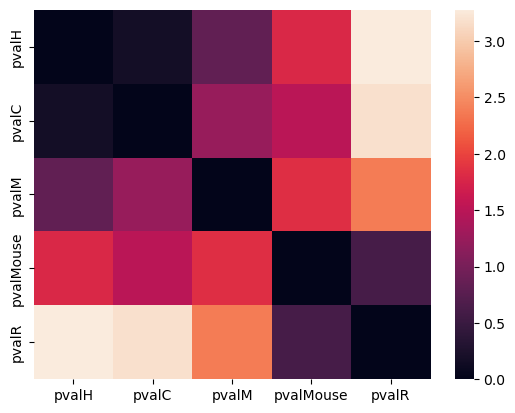

In [168]:
import matplotlib.pyplot as plt
corrr = total.dropna(axis=0).drop_duplicates().head(20).loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']].corr('pearson').sort_values('pvalH',ascending=False).sort_values('pvalH',axis=1,ascending=False)
corrr
sns.heatmap(-1*np.log(corrr))
plt.show()

In [122]:
corrr.to_numpy()
distance_ids = corrr.columns

Index(['pvalMouse', 'pvalH', 'pvalC', 'pvalM', 'pvalR'], dtype='object')

In [141]:
(-1*np.log(corrr)).to_csv('distances.txt',sep='\t')

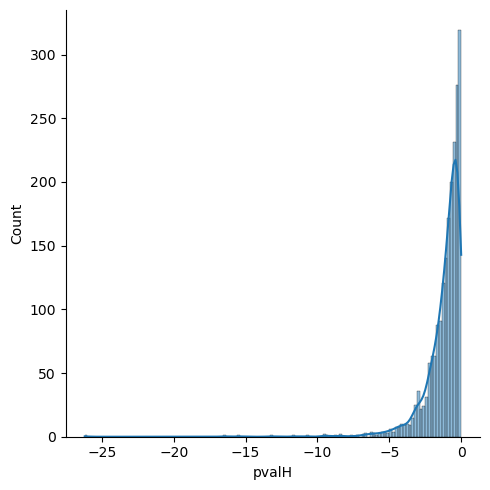

In [170]:
import matplotlib.pyplot as plt
sns.displot(np.log(top_motifs['pvalH']),kde=True)
plt.show()

In [6]:
top_motifs = pd.read_csv('7nt-positions.csv')
def cleanConcat(species,idx):
    revcomp= pd.concat([top_motifs[species].apply(lambda x: flipSEQ(x)),top_motifs[idx]],axis=1)
    return pd.concat([revcomp,top_motifs.loc[:,[species,idx]]],axis=0,ignore_index=True)
def cleanMerge(df,right_on,idx):
    right_db = cleanConcat(right_on,idx)
    return df.merge(right_db,how='left',left_on='Human',right_on=right_on)


In [7]:
# humanRevComp = pd.concat([top_motifs.Human.apply(lambda x: flipSEQ(x)),top_motifs.pvalH],axis=1)
# human = pd.concat([humanRevComp,top_motifs.loc[:,['Human','pvalH']]],axis=0,ignore_index=True)
human = cleanConcat('Human','pvalH')
human

,Human,pvalH
0,CCCCGCC,3.400000e-08
1,CCCGCCC,3.080000e-06
2,GCCCCGC,9.290000e-06
3,CCGCCCC,1.860000e-05
4,TACGGAG,2.033430e-04
...,...,...
16379,GTCTGAG,9.993099e-01
16380,GCTGAGA,9.993669e-01
16381,AGCATTC,9.994375e-01
16382,CAGTGCC,9.994572e-01


In [10]:
total = cleanMerge(human,'Chimp','pvalC')
total = cleanMerge(total, 'Monkey','pvalM')
total = cleanMerge(total,'Mouse','pvalMouse')
total = total.merge(top_motifs.loc[:,['Rat','pvalR']],how='right',left_on='Human',right_on='Rat')
total

,Human,pvalH,Chimp,pvalC,Monkey,pvalM,Mouse,pvalMouse,Rat,pvalR
0,CAGTACT,0.222122,CAGTACT,0.362611,CAGTACT,0.376189,CAGTACT,0.090936,CAGTACT,0.000016
1,CTGAGAG,0.664587,CTGAGAG,0.791055,CTGAGAG,0.796473,CTGAGAG,0.234594,CTGAGAG,0.000193
2,ACCACCC,0.297680,ACCACCC,0.952047,ACCACCC,0.671779,ACCACCC,0.463579,ACCACCC,0.000208
3,TATTTTT,0.017885,TATTTTT,0.130222,TATTTTT,0.224281,TATTTTT,0.075482,TATTTTT,0.000350
4,GGTCACG,0.331676,GGTCACG,0.905980,GGTCACG,0.009838,GGTCACG,0.652574,GGTCACG,0.000372
...,...,...,...,...,...,...,...,...,...,...
8187,ATGGGCC,0.063307,ATGGGCC,0.078353,ATGGGCC,0.795072,ATGGGCC,0.683283,ATGGGCC,0.999573
8188,TTGCTTC,0.511443,TTGCTTC,0.716974,TTGCTTC,0.917962,TTGCTTC,0.481655,TTGCTTC,0.999783
8189,GAAACTC,0.268170,GAAACTC,0.000954,GAAACTC,0.303334,GAAACTC,0.863095,GAAACTC,0.999791
8190,TGGGGGG,0.085100,TGGGGGG,0.797180,TGGGGGG,0.640227,TGGGGGG,0.223298,TGGGGGG,0.999873


In [16]:
total.dropna(axis=0).drop_duplicates().sort_values('pvalH').to_csv('7nt-comparisons.csv',index=False)#.loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']]

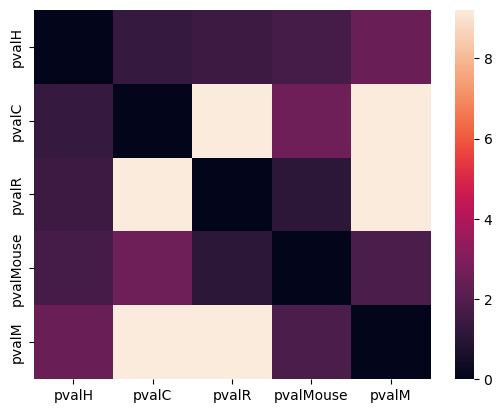

In [69]:
corrr = total.dropna(axis=0).drop_duplicates().head(20).loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']].corr('pearson').sort_values('pvalH',ascending=False).sort_values('pvalH',axis=1,ascending=False)
corrr
sns.heatmap(-1*np.log(np.clip(corrr,0.0001,1)))
plt.show()

In [67]:
np.clip(corrr,0.0001,1)

,pvalH,pvalM,pvalMouse,pvalC,pvalR
pvalH,1.000000,0.172581,0.130913,0.074892,0.027745
pvalM,0.172581,1.000000,0.000100,0.000100,0.079962
pvalMouse,0.130913,0.000100,1.000000,0.043996,0.078033
pvalC,0.074892,0.000100,0.043996,1.000000,0.000100
pvalR,0.027745,0.079962,0.078033,0.000100,1.000000


In [70]:
(-1*np.log(np.clip(corrr,0.0001,1))).to_csv('distances7nt.txt',sep='\t')

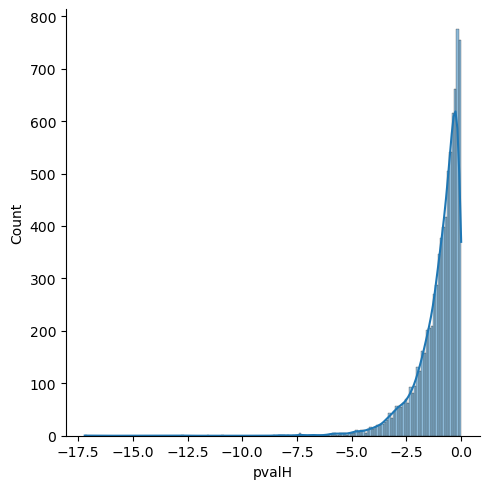

In [71]:
import matplotlib.pyplot as plt
sns.displot(np.log(top_motifs['p-valueH']),kde=True)
plt.show()

In [47]:
top_motifs = pd.read_csv('6nt-oligos.csv')
def cleanConcat(species,idx):
    revcomp= pd.concat([top_motifs[species].dropna().apply(lambda x: flipSEQ(x)),top_motifs[idx].dropna()],axis=1)
    return pd.concat([revcomp,top_motifs.loc[:,[species,idx]].dropna()],axis=0,ignore_index=True)
def cleanMerge(df,right_on,idx):
    right_db = cleanConcat(right_on,idx)
    return df.merge(right_db,how='left',left_on='Human',right_on=right_on)


In [48]:
# humanRevComp = pd.concat([top_motifs.Human.apply(lambda x: flipSEQ(x)),top_motifs.pvalH],axis=1)
# human = pd.concat([humanRevComp,top_motifs.loc[:,['Human','pvalH']]],axis=0,ignore_index=True)
human = cleanConcat('Human','z-scoreH')
human

,Human,z-scoreH
0,CCGCCC,247.556293
1,CCCGCC,242.783481
2,AGGAAG,215.757546
3,GGGAGG,209.685812
4,CCCCGC,202.169548
...,...,...
4093,ACGCGT,-21.311584
4094,ACCGGT,-22.844702
4095,CGTACG,-23.696435
4096,GTCGAC,-24.445959


In [49]:
total = cleanMerge(human,'Chimp','z-scoreC')
total = cleanMerge(total, 'Monkey','z-scoreM')
total = cleanMerge(total,'Mouse','z-scoreMouse')
total = total.merge(top_motifs.loc[:,['Rat','z-scoreR']].dropna(),how='right',left_on='Human',right_on='Rat')
total
total.dropna(axis=0).sort_values(['z-scoreH','z-scoreC','z-scoreM','z-scoreMouse','z-scoreR'],ascending=False).drop_duplicates(subset=['Human']).to_csv('6nt-comparisons-oligos.csv',index=False)#.loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']]

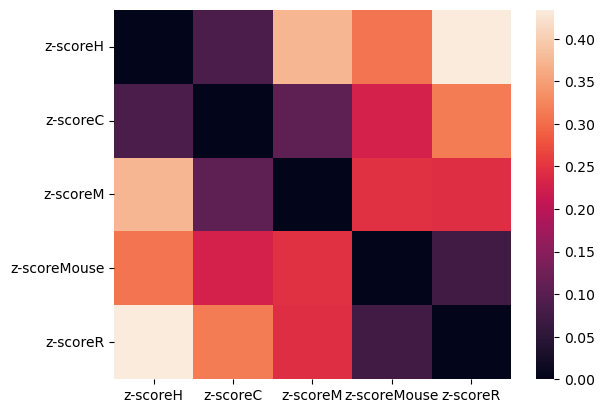

In [41]:
corrr = total.dropna(axis=0).head(20).drop_duplicates().loc[:,['z-scoreH','z-scoreC','z-scoreM','z-scoreMouse','z-scoreR']].corr('pearson')#.sort_values('p-valueH',ascending=False).sort_values('p-valueH',axis=1,ascending=False)
corrr
sns.heatmap(-1*np.log(np.clip(corrr,0.0001,1)))
plt.show()

In [40]:
np.abs(-1*np.log(np.clip(corrr,0.0001,1))).to_csv('distances6nt-oligos.txt',sep='\t')

c:\Users\Cameron\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


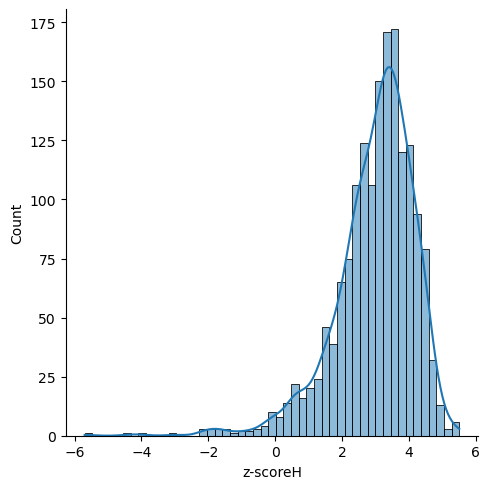

In [25]:
import matplotlib.pyplot as plt
sns.displot(np.log(top_motifs['z-scoreH']+0.00000001),kde=True)
plt.show()

In [46]:
top_motifs = pd.read_csv('7nt-oligos.csv')
def cleanConcat(species,idx):
    revcomp= pd.concat([top_motifs[species].dropna().apply(lambda x: flipSEQ(x)),top_motifs[idx].dropna()],axis=1)
    return pd.concat([revcomp,top_motifs.loc[:,[species,idx]].dropna()],axis=0,ignore_index=True)
def cleanMerge(df,right_on,idx):
    right_db = cleanConcat(right_on,idx)
    return df.merge(right_db,how='left',left_on='Human',right_on=right_on)
human = cleanConcat('Human','z-scoreH')
human
total = cleanMerge(human,'Chimp','z-scoreC')
total = cleanMerge(total, 'Monkey','z-scoreM')
total = cleanMerge(total,'Mouse','z-scoreMouse')
total = total.merge(top_motifs.loc[:,['Rat','z-scoreR']].dropna(),how='right',left_on='Human',right_on='Rat')
total
total.dropna(axis=0).sort_values(['z-scoreH','z-scoreC','z-scoreM','z-scoreMouse','z-scoreR'],ascending=False).drop_duplicates(subset=['Human']).to_csv('7nt-comparisons-oligos.csv',index=False)#.loc[:,['pvalH','pvalC','pvalM','pvalMouse','pvalR']]


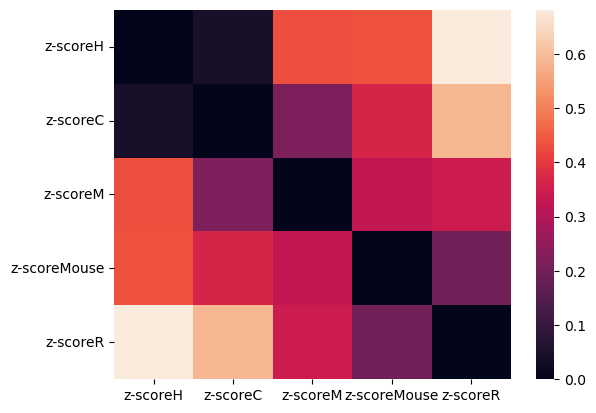

In [34]:
corrr = total.dropna(axis=0).head(20).drop_duplicates().loc[:,['z-scoreH','z-scoreC','z-scoreM','z-scoreMouse','z-scoreR']].corr('pearson')#.sort_values('p-valueH',ascending=False).sort_values('p-valueH',axis=1,ascending=False)
corrr
sns.heatmap(-1*np.log(np.clip(corrr,0.0001,1)))
plt.show()

In [35]:
np.abs(-1*np.log(np.clip(corrr,0.0001,1))).to_csv('distances7nt-oligos.txt',sep='\t')

c:\Users\Cameron\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


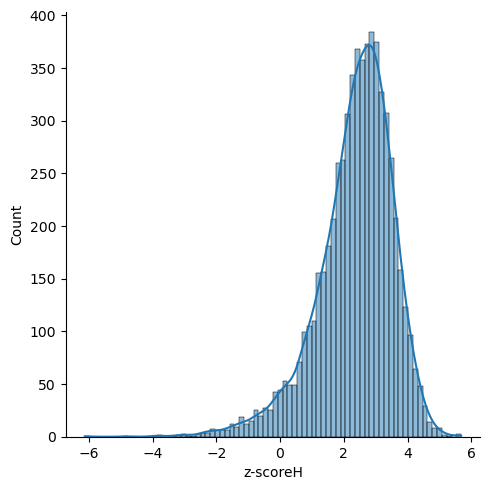

In [31]:
import matplotlib.pyplot as plt
sns.displot(np.log(top_motifs['z-scoreH']+0.00000001),kde=True)
plt.show()

In [3]:
#cross algorithm comparisons
positions_6nt = pd.read_csv('6nt-comparisons-positions.csv')
oligos_6nt = pd.read_csv('6nt-comparisons-oligos.csv')

In [4]:
positions_6nt

,Human,pvalH,Chimp,pvalC,Monkey,pvalM,Mouse,pvalMouse,Rat,pvalR
0,CCCCGC,4.180000e-12,CCCCGC,0.482912,CCCCGC,0.160531,CCCCGC,0.705022,CCCCGC,0.058950
1,GGGCGG,6.880000e-08,GGGCGG,0.014383,GGGCGG,0.309068,GGGCGG,0.107161,GGGCGG,0.117493
2,CCCGCC,1.950000e-07,CCCGCC,0.003224,CCCGCC,0.624988,CCCGCC,0.842926,CCCGCC,0.010147
3,GTGACG,1.860000e-06,GTGACG,0.092117,GTGACG,0.909377,GTGACG,0.230809,GTGACG,0.321412
4,TGGCCA,8.880000e-06,TGGCCA,0.405270,TGGCCA,0.007241,TGGCCA,0.009692,TGGCCA,0.001158
...,...,...,...,...,...,...,...,...,...,...
2075,GCCGTG,9.985700e-01,GCCGTG,0.005724,GCCGTG,0.955861,GCCGTG,0.297674,GCCGTG,0.967121
2076,AACCCG,9.989898e-01,AACCCG,0.654010,AACCCG,0.819630,AACCCG,0.185872,AACCCG,0.635224
2077,TTTGGT,9.993825e-01,TTTGGT,0.883393,TTTGGT,0.838927,TTTGGT,0.491703,TTTGGT,0.876446
2078,TGATAA,9.995840e-01,TGATAA,0.890429,TGATAA,0.039218,TGATAA,0.376927,TGATAA,0.949953


In [5]:
def cleanConcat(db,species,idx):
    revcomp= pd.concat([db[species].dropna().apply(lambda x: flipSEQ(x)),db[idx].dropna()],axis=1)
    return pd.concat([revcomp,db.loc[:,[species,idx]].dropna()],axis=0,ignore_index=True)
def cleanMerge(dfLeft,dfRight,right_on,idx,how='inner'):
    right_db = cleanConcat(dfRight,right_on,idx)
    return dfLeft.merge(right_db,how=how,left_on='Human',right_on=right_on)


In [6]:
cleanMerge(cleanConcat(positions_6nt,'Human','pvalH'),oligos_6nt,'Human','z-scoreH').drop_duplicates()[['pvalH','z-scoreH']].sort_values('z-scoreH',ascending=False).head(100).corr('spearman')

,pvalH,z-scoreH
pvalH,1.000000,-0.353373
z-scoreH,-0.353373,1.000000


In [7]:
cleanMerge(cleanConcat(positions_6nt.sort_values('pvalH').head(200),'Human','pvalH'),oligos_6nt.sort_values('z-scoreH',ascending=False).head(200),'Human','z-scoreH').drop_duplicates()[['pvalH','z-scoreH']].sort_values('z-scoreH',ascending=False).corr('spearman')

,pvalH,z-scoreH
pvalH,1.000000,-0.529573
z-scoreH,-0.529573,1.000000


In [8]:
positions_7nt = pd.read_csv('7nt-comparisons-positions.csv')
oligos_7nt = pd.read_csv('7nt-comparisons-oligos.csv')

In [10]:
cleanMerge(cleanConcat(positions_7nt.sort_values('pvalH').head(200),'Human','pvalH'),oligos_7nt.sort_values('z-scoreH',ascending=False).head(200),'Human','z-scoreH').drop_duplicates()[['pvalH','z-scoreH']].sort_values('z-scoreH',ascending=False).corr('spearman')

,pvalH,z-scoreH
pvalH,1.000000,-0.629371
z-scoreH,-0.629371,1.000000


In [139]:
cleanMerge(cleanConcat(positions_7nt,'Human','pvalH'),oligos_7nt,'Human','z-scoreH').drop_duplicates()[['pvalH','z-scoreH']].sort_values('z-scoreH',ascending=False).to_csv('7nt-algo-comparison.csv',index=False)